# **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

In [654]:
# Importación de librerías básicas para manipulación de datos
import pandas as pd
import numpy as np
import re

# Importación de herramientas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de librerías para preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE, VarianceThreshold

# Importación de herramientas para separar datos y validación cruzada
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV

# Importación de modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV

# Importación de métricas y herramientas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Importación de herramientas para tratamiento de clases desbalanceadas y reducción de dimensionalidad
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Importación de herramientas estadísticas
from scipy import stats

# Ignorar Advertencías de paquetería interna
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [655]:
df = pd.read_excel("Modelo_base_consolidado.xlsx")

In [656]:
# Visualizar las primeras filas del conjunto de datos
df.head()

,Ranking,No. Identificación,Estado,Origen,Contratado el,Etiquetas,Fecha de Ingreso a Proceso (Zona horaria GMT 0),Fecha de Finalización de Proceso (Zona horaria GMT 0),Ciudad,Género,...,Trabajo en equipo_Cumplimiento,Nombre del Proceso,Nombre del Perfil,Inicio (Zona horaria GMT 0),Fin (Zona horaria GMT 0),RECORD_SOURCE,LOAD_DATE,PROCESS_DATA,CREATION_USER,Permanencia>6meses
0,1,ID00000001,TERMINADO,NaN,NaN,NaN,2022-01-16 15:27:00,2022-01-23 03:25:00,MALA,FEMENINO,...,1.00,proceso 1,CAJERO,16/01/2023 15:27,04/03/2023 21:27,Base_1.xlsx,2023-09-24 16:00,2023-09-24 16:00,Ian,1
1,2,ID00000054,TERMINADO,NaN,NaN,NaN,2022-01-30 17:37:00,2022-02-03 08:47:00,MALA,FEMENINO,...,1.00,proceso 1,CAJERO,16/01/2023 15:27,04/03/2023 21:27,Base_1.xlsx,2023-09-24 16:00,2023-09-24 16:00,Ian,1
2,3,ID00000032,TERMINADO,NaN,NaN,NaN,2022-01-18 14:20:00,2022-01-18 18:11:00,MALA,MASCULINO,...,0.95,proceso 1,CAJERO,16/01/2023 15:27,04/03/2023 21:27,Base_1.xlsx,2023-09-24 16:00,2023-09-24 16:00,Ian,1
3,5,ID00000031,TERMINADO,NaN,NaN,NaN,2022-02-02 00:53:00,2022-02-02 16:47:00,MALA,FEMENINO,...,0.95,proceso 1,CAJERO,16/01/2023 15:27,04/03/2023 21:27,Base_1.xlsx,2023-09-24 16:00,2023-09-24 16:00,Ian,1
4,6,ID00000061,TERMINADO,NaN,NaN,NaN,2022-01-18 14:20:00,2022-01-18 22:19:00,IMPERIAL,FEMENINO,...,0.95,proceso 1,CAJERO,16/01/2023 15:27,04/03/2023 21:27,Base_1.xlsx,2023-09-24 16:00,2023-09-24 16:00,Ian,1


In [657]:
# Obtener estadísticas descriptivas
df.describe()

,Ranking,Contratado el,Etiquetas,Fecha de Ingreso a Proceso (Zona horaria GMT 0),Fecha de Finalización de Proceso (Zona horaria GMT 0),Edad,Calidad del trabajo_Valor,Calidad del trabajo_Esperado,Calidad del trabajo_Brecha,Calidad del trabajo_Cumplimiento,...,Resolución de problemas_Cumplimiento,Tesón y disciplina_Valor,Tesón y disciplina_Esperado,Tesón y disciplina_Brecha,Tesón y disciplina_Cumplimiento,Trabajo en equipo_Valor,Trabajo en equipo_Esperado,Trabajo en equipo_Brecha,Trabajo en equipo_Cumplimiento,Permanencia>6meses
count,4975.000000,0.0,0.0,4975,4975,4966.000000,4975.000000,4975.000000,4975.000000,4975.000000,...,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,2509.529246,NaN,NaN,2022-07-10 08:04:25.664321536,2022-07-15 07:12:35.360804096,23.309102,4.813857,6.012663,-1.539540,0.845087,...,0.740693,4.248907,6.012663,-1.954394,0.805592,4.770352,6.012663,-1.837337,0.817461,0.377487
min,1.000000,NaN,NaN,2022-01-16 15:27:00,2022-01-16 16:05:00,0.000000,0.000000,6.000000,-6.000000,0.400000,...,0.340000,0.000000,6.000000,-7.000000,0.300000,0.000000,6.000000,-6.500000,0.350000,0.000000
25%,1223.500000,NaN,NaN,2022-05-31 22:03:00,2022-06-01 18:33:30,19.000000,3.840000,6.000000,-2.160000,0.780000,...,0.570000,3.150000,6.000000,-2.850000,0.710000,2.500000,6.000000,-3.500000,0.650000,0.000000
50%,2516.000000,NaN,NaN,2022-07-05 00:39:00,2022-08-04 15:13:00,21.000000,5.000000,6.000000,-1.000000,0.900000,...,0.790000,3.890000,6.000000,-2.110000,0.790000,5.000000,6.000000,-1.000000,0.900000,0.000000
75%,3790.500000,NaN,NaN,2022-08-18 03:48:00,2022-08-25 00:38:00,25.000000,6.160000,6.000000,0.000000,1.000000,...,0.900000,5.370000,6.000000,-0.630000,0.940000,6.250000,6.000000,0.000000,1.000000,1.000000
max,5079.000000,NaN,NaN,2022-09-14 16:42:00,2022-09-14 17:45:00,89.000000,10.000000,7.000000,2.000000,1.000000,...,1.000000,10.000000,7.000000,1.000000,1.000000,10.000000,7.000000,2.500000,1.000000,1.000000
std,1481.951945,NaN,NaN,NaN,NaN,6.359244,1.939767,0.111828,1.432638,0.143019,...,0.179273,1.755912,0.111828,1.405032,0.140022,2.617221,0.111828,1.867773,0.185294,0.484807


In [658]:
df.columns

Index(['Ranking', 'No. Identificación', 'Estado', 'Origen', 'Contratado el',
       'Etiquetas', 'Fecha de Ingreso a Proceso (Zona horaria GMT 0)',
       'Fecha de Finalización de Proceso (Zona horaria GMT 0)', 'Ciudad',
       'Género', 'Estado Civil', 'Edad', 'Discapacidad', 'Reubicación laboral',
       'Última Experiencia_Empresa', 'Última Experiencia_Cargo',
       'Última Experiencia_Inicio', 'Última Experiencia_Fin',
       'Última Experiencia_Actividades', 'Habilidades Habilidad (Nivel)',
       'Idiomas Idioma (Nivel)', 'Motivadores Laborales',
       'Preguntas filtro_Indícanos el género que figura en tu DNI',
       'Preguntas filtro_Indícanos tu nivel educativo alcanzado',
       'Preguntas filtro_Indícanos tu ubicación actual',
       'Preguntas filtro_Indícanos tu estado civil',
       'Preguntas filtro_¿Estas estudiando actualmente?',
       'Calidad del trabajo_Valor', 'Calidad del trabajo_Esperado',
       'Calidad del trabajo_Brecha', 'Calidad del trabajo_Cumplimient

In [659]:
df['Preguntas filtro_Indícanos tu ubicación actual']

0       Provincias
1       Provincias
2             Lima
3       Provincias
4       Provincias
           ...    
4970          Lima
4971          Lima
4972          Lima
4973          Lima
4974          Lima
Name: Preguntas filtro_Indícanos tu ubicación actual, Length: 4975, dtype: object

## **GRÁFICAS**

In [660]:

# Viendo si la data esta balanceada
conteo_filas = df['Preguntas filtro_Indícanos tu ubicación actual'].value_counts()
suma_total = conteo_filas.sum()
print(conteo_filas)

Preguntas filtro_Indícanos tu ubicación actual
Lima          4886
Provincias      88
Name: count, dtype: int64


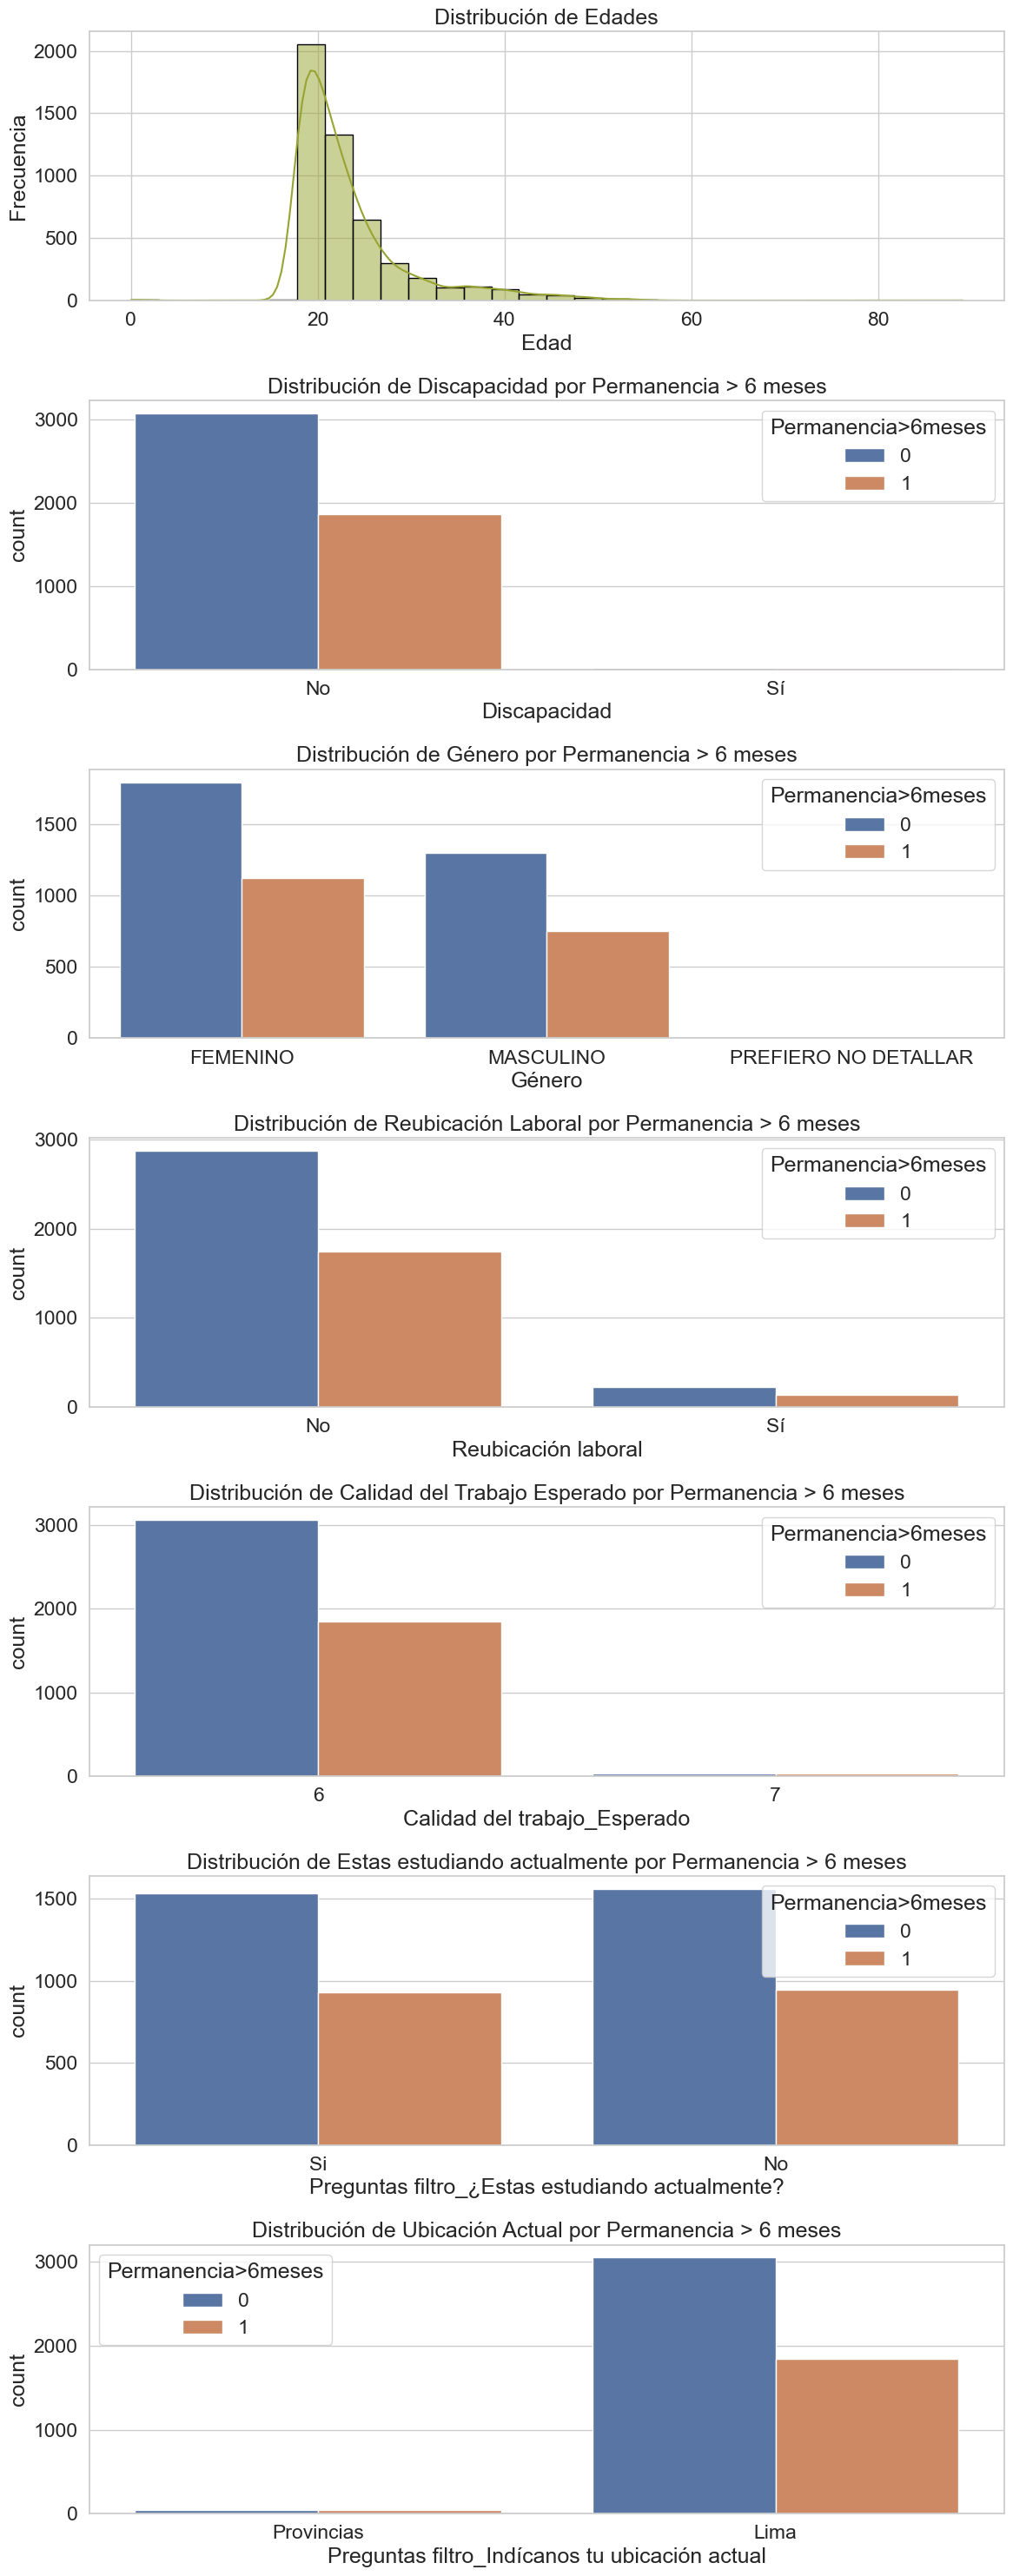

In [661]:

# Establecer el estilo y el contexto para hacer los gráficos más bonitos
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Crear una paleta de colores personalizada
palette = sns.color_palette("husl", 8)

# Crear la figura con múltiples subplots
fig, axs = plt.subplots(7, 1, figsize=(12, 30))

# Histograma de Distribución de Edades
sns.histplot(df['Edad'], bins=30, edgecolor='black', color=palette[2], kde=True, ax=axs[0])
axs[0].set_title('Distribución de Edades')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# Gráficos de countplot
titles = ['Distribución de Discapacidad por Permanencia > 6 meses',
            'Distribución de Género por Permanencia > 6 meses',
            'Distribución de Reubicación Laboral por Permanencia > 6 meses',
            'Distribución de Calidad del Trabajo Esperado por Permanencia > 6 meses',
            'Distribución de Estas estudiando actualmente por Permanencia > 6 meses',
            'Distribución de Ubicación Actual por Permanencia > 6 meses']

cols = ['Discapacidad', 'Género', 'Reubicación laboral',  
        'Calidad del trabajo_Esperado','Preguntas filtro_¿Estas estudiando actualmente?','Preguntas filtro_Indícanos tu ubicación actual']

for i, (title, col) in enumerate(zip(titles, cols)):
    sns.countplot(data=df, x=col, hue='Permanencia>6meses', ax=axs[i+1])
    axs[i+1].set_title(title)

plt.tight_layout()
plt.show()


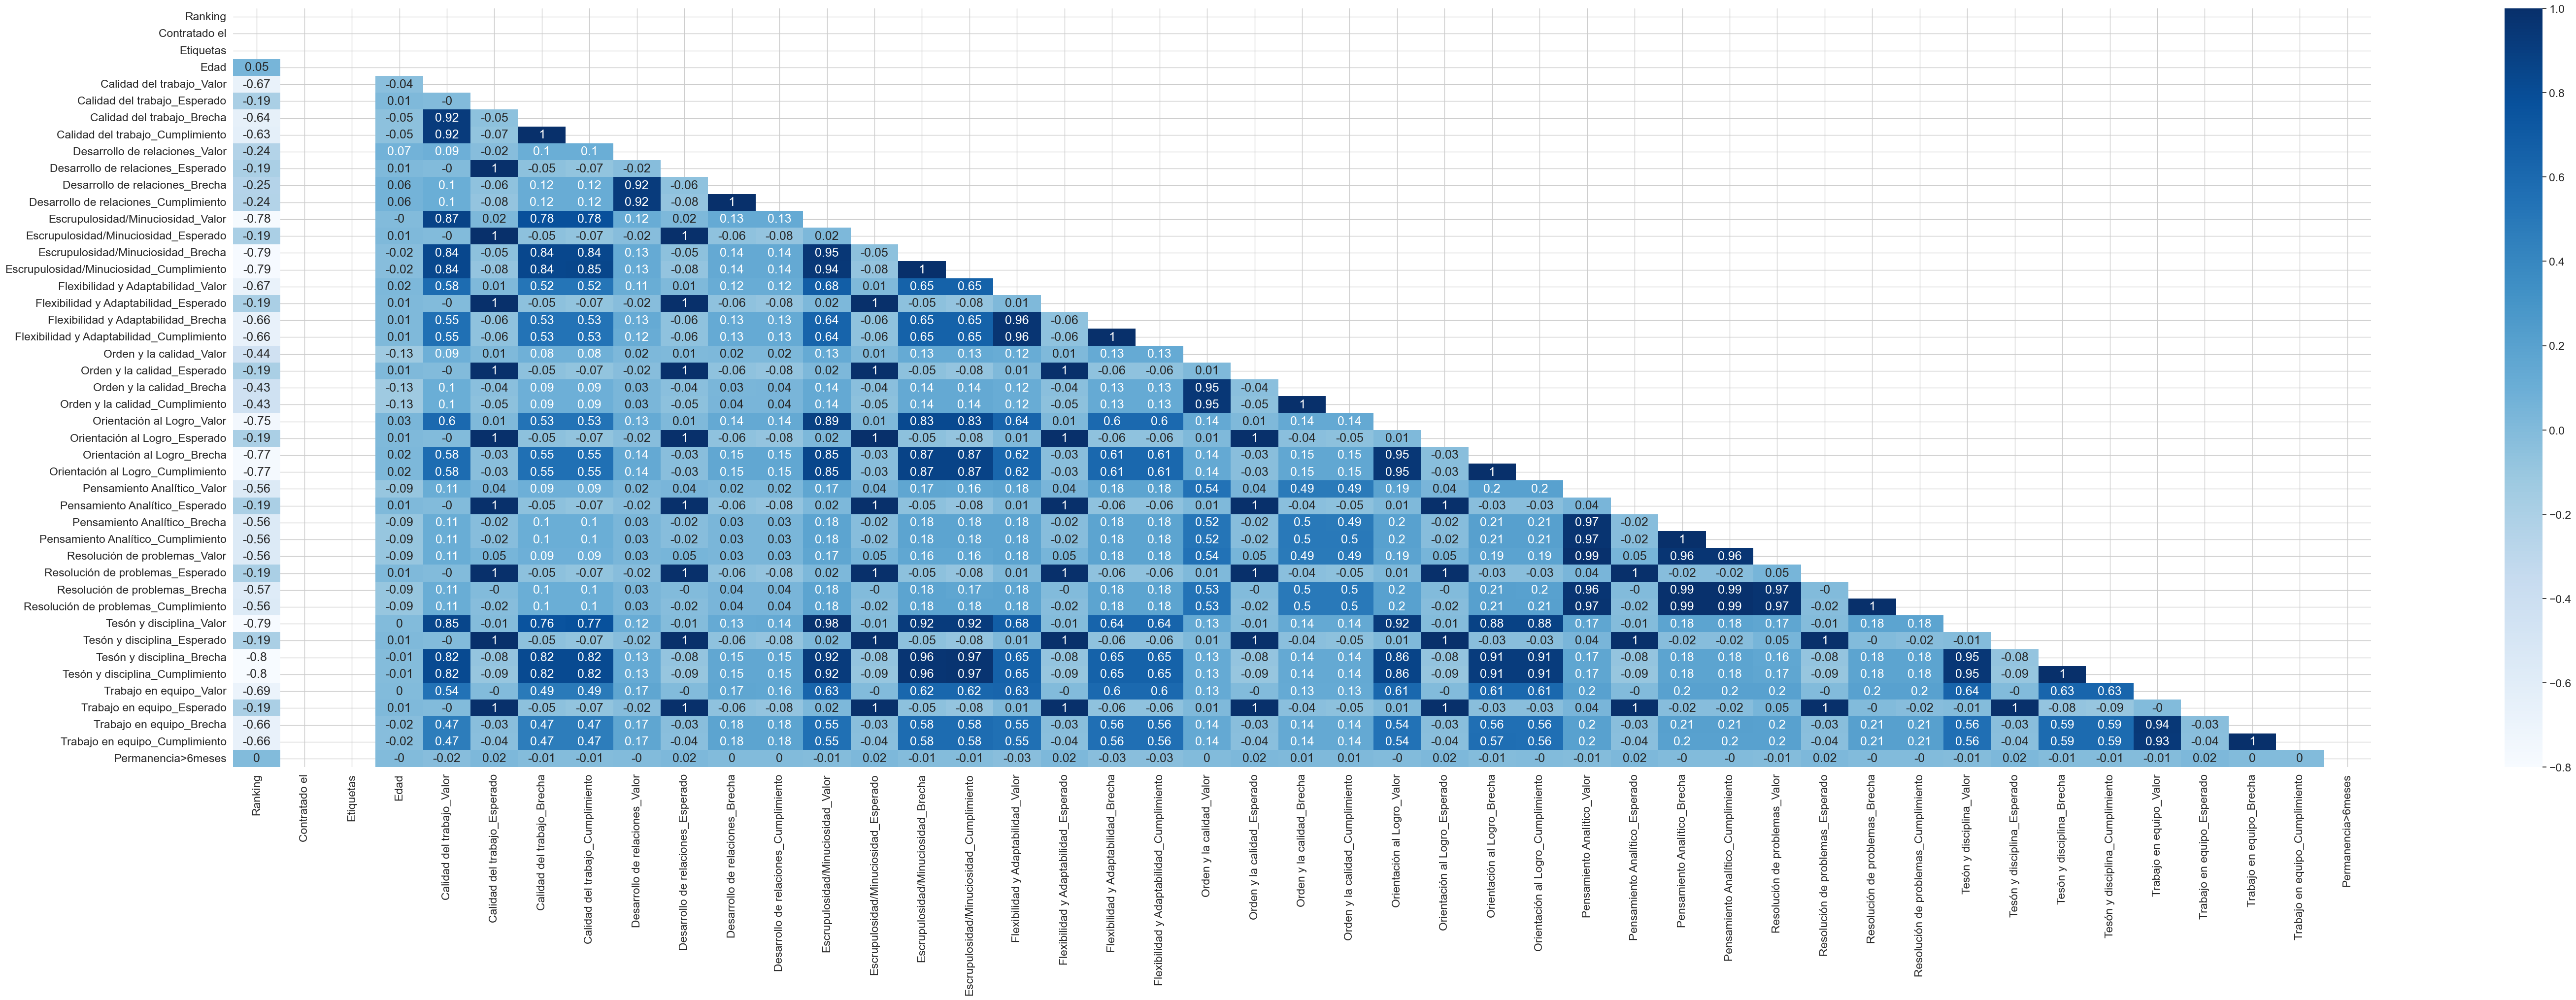

In [662]:
# Seleccionamos solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la correlación
correlacion = df_numeric.corr().round(2)

# Creamos una máscara para ocultar la mitad inferior
mask = np.triu(np.ones_like(correlacion, dtype=bool))

# Graficamos el heatmap solo con la mitad superior
fig, ax = plt.subplots(figsize=(70,20))
ax = sns.heatmap(correlacion, annot=True, cmap="Blues", mask=mask)
plt.show()


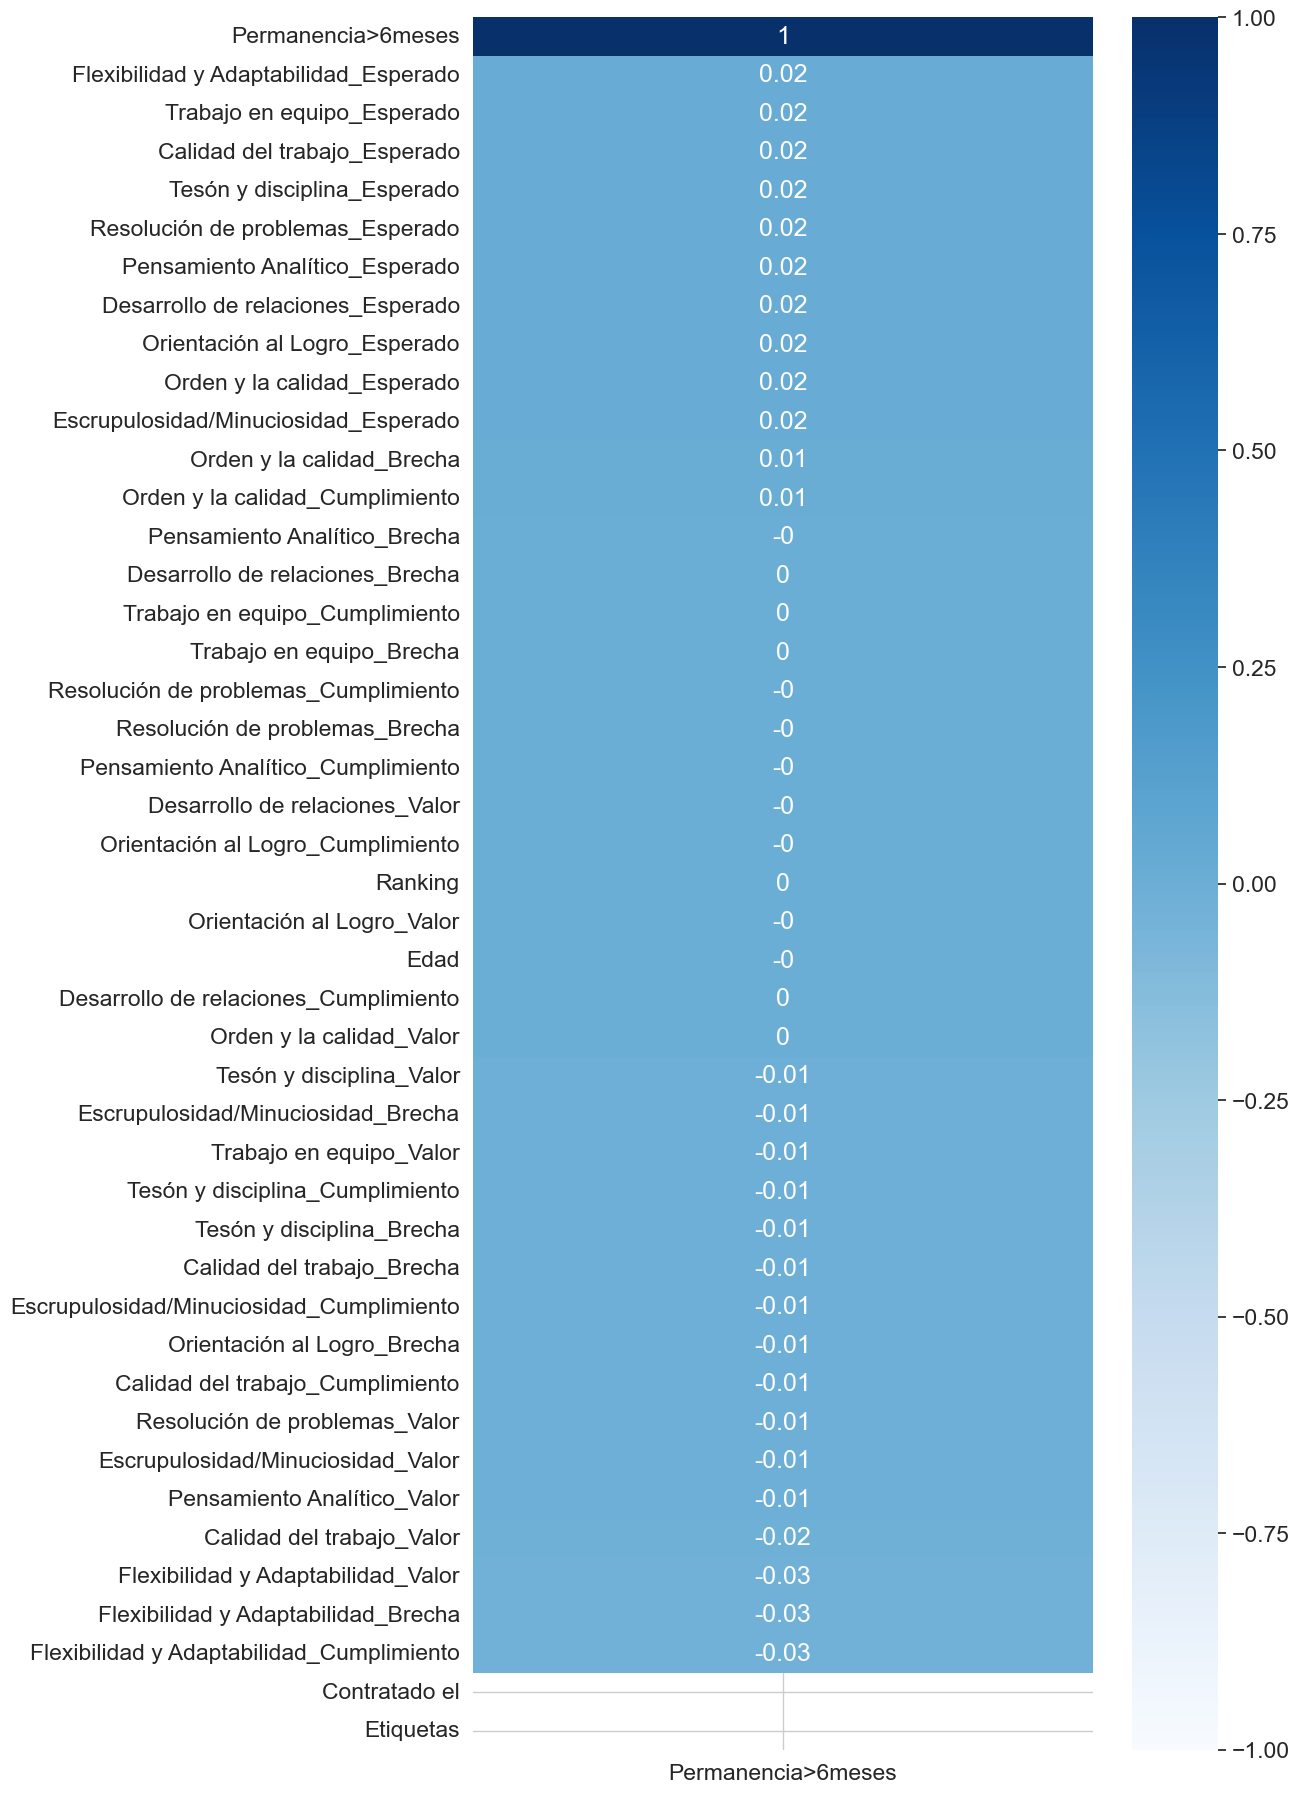

In [663]:
# Seleccionamos solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la correlación
correlacion = df_numeric.corr().round(2)

# Seleccionamos la correlación con respecto a la variable_objetivo
correlacion_objetivo = correlacion[['Permanencia>6meses']]

# Graficamos el heatmap
fig, ax = plt.subplots(figsize=(10, len(correlacion_objetivo) / 2))
ax = sns.heatmap(correlacion_objetivo.sort_values(by='Permanencia>6meses', ascending=False), annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.show()


## **FEATURE ENGINEERING**





In [664]:
df = df.drop([ "Ranking", "No. Identificación", "Fecha de Ingreso a Proceso (Zona horaria GMT 0)", 
    "Fecha de Finalización de Proceso (Zona horaria GMT 0)", "Inicio  (Zona horaria GMT 0)", 
    "Fin  (Zona horaria GMT 0)", "RECORD_SOURCE", "LOAD_DATE", "PROCESS_DATA", "CREATION_USER", 
    "Contratado el", "Etiquetas","Habilidades Habilidad (Nivel)","Idiomas Idioma (Nivel)","Última Experiencia_Actividades","Última Experiencia_Cargo","Última Experiencia_Empresa","Nombre del Perfil","Nombre del Proceso","Origen","Preguntas filtro_Indícanos tu estado civil"], axis=1)


In [665]:
df=df[df['Estado']=="TERMINADO"]
df.drop('Estado', axis=1, inplace=True)

In [666]:
# Viendo la cantidad de nulos
missing_values_count = df.isnull().sum()
missing_values_greater_than_zero = missing_values_count[missing_values_count > 0]
print(missing_values_greater_than_zero)

Ciudad                          9
Género                          4
Estado Civil                    9
Edad                            9
Discapacidad                   14
Última Experiencia_Inicio    1978
Última Experiencia_Fin       2223
Motivadores Laborales        1774
dtype: int64


In [667]:
# Imputación para columnas numéricas usando KNN
knn_imputer = KNNImputer(n_neighbors=5)  # puedes ajustar el número de vecinos si es necesario

# Selecciona solo las columnas numéricas
numeric_data = df.select_dtypes(exclude='object')

# Imputa los valores faltantes en las columnas numéricas
df[numeric_data.columns] = knn_imputer.fit_transform(numeric_data)

# Imputación para columnas categóricas usando la moda
simple_imputer = SimpleImputer(strategy="most_frequent")

# Selecciona solo las columnas categóricas
categorical_data = df.select_dtypes(include='object')

# Imputa los valores faltantes en las columnas categóricas
df[categorical_data.columns] = simple_imputer.fit_transform(categorical_data)

# Verificar si aún hay valores faltantes
remaining_missing = df.isnull().sum().sum()

remaining_missing


0

In [668]:
# Viendo la cantidad de nulos
missing_values_count = df.isnull().sum()
missing_values_greater_than_zero = missing_values_count[missing_values_count > 0]
print(missing_values_greater_than_zero)

Series([], dtype: int64)


In [669]:
# Viendo únicos
columns=df.columns
for i in columns:
    print(i)
    print(df[i].unique())

Ciudad
['MALA' 'IMPERIAL' 'ICA' 'SAN VICENTE DE CAÑETE' 'SAN LUIS' 'LIMA'
 'CHIMBOTE' 'QUILMANÁ' 'SANTA' 'NUEVO IMPERIAL' 'CHILCA' 'CALLAO' 'PICSI'
 'AYACUCHO' 'AREQUIPA' 'PIURA' 'CHOSICA' 'TACNA' 'CALABOZO' 'NAZCA'
 'SULLANA' 'SAYÁN' 'SANTA EULALIA' 'ABANCAY' 'LAMBAYEQUE' 'IQUITOS'
 'CATACAOS' 'PARAMONGA' 'SANTA MARÍA' 'HUARAL' 'CHINCHA ALTA' 'SANTIAGO'
 'HUACHO' 'TRUJILLO' 'CAJAMARCA' 'RICARDO PALMA' 'HUANCAVELICA' 'BARRANCA'
 'HUARAZ' 'ILO' 'CHICLAYO' 'ANDAHUAYLAS' 'TALARA' 'CUTERVO' 'JULIACA'
 'HUANCAYO' 'CHICLA' 'PUCALLPA' 'CORACORA' 'MONSEFÚ' 'OTRA' 'TAMBO GRANDE'
 'HUANTA' 'CHACHAPOYAS' 'MOYOBAMBA']
Género
['FEMENINO' 'MASCULINO' 'PREFIERO NO DETALLAR']
Estado Civil
['SOLTERO/A' 'CASADO/A' 'UNIÓN DE HECHO / CONVIVIENTE' 'DIVORCIADO/A'
 'VIUDO/A']
Edad
[20.  19.  23.  24.  39.  25.  27.  29.  18.  36.  21.  28.  22.  37.
 26.  33.  31.  32.  50.  44.  43.  34.  41.  30.  38.  49.  46.  42.
  1.  47.  45.  57.  52.  35.  40.  17.  53.  20.2 48.  55.  21.4 89.
 51.  54.  15.   0.  

### **Creación, nuevas caracteristicas**

In [670]:
# Procesamiento De Lenguaje Natural
# 1. Tokenización y Limpieza del Texto
def clean_text(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text)  # Reemplazar secuencias de espacios en blanco con un solo espacio
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar todo lo que no sean letras (puntuación, números, etc.)
    return text

df['Motivadores Laborales'] = df['Motivadores Laborales'].apply(clean_text)

# 2. Análisis de Frecuencia
# Usar CountVectorizer para obtener las palabras más frecuentes
vectorizer = CountVectorizer(max_features=20)  # Suponiendo que deseas extraer las 20 palabras más frecuentes como características
X = vectorizer.fit_transform(df['Motivadores Laborales'])
feature_names = vectorizer.get_feature_names_out()

# Crear un DataFrame con las palabras más frecuentes
df_words = pd.DataFrame(X.toarray(), columns=feature_names)

# 3. Creación de Características
# Concatenar el DataFrame original con el DataFrame de palabras más frecuentes
df = pd.concat([df, df_words], axis=1)

# Opcional: eliminar la columna original 'Motivadores Laborales'
df.drop('Motivadores Laborales', axis=1, inplace=True)

# Eliminar columnas de "palabras de parada"
stop_words = ["de", "en", "con","plan","por","buen"]  # Agrega o elimina palabras según lo consideres necesario
df.drop(columns=stop_words, inplace=True, errors='ignore')

columns_to_fill = ['bonificaciones', 'capacitacin', 'carrera','clientes','clima','crecimiento','desarrollo','desempeo','empresa','equipo','liderjefe','profesional','satisfechos','trabajo']  # lista de todas las columnas mencionadas
df[columns_to_fill] = df[columns_to_fill].fillna(0)


In [671]:

df['Duracion_UltimaEXP'] = (pd.to_datetime(df['Última Experiencia_Fin'], format='%d/%m/%y') - 
                            pd.to_datetime(df['Última Experiencia_Inicio'], format='%d/%m/%y')).dt.days
df.drop('Última Experiencia_Fin', axis=1, inplace=True)
df.drop('Última Experiencia_Inicio', axis=1, inplace=True)

- Adulto joven: Adultos entre 18 y 30 años (incluyendo 18 y excluyendo 30).
- Adulto medio: Adultos entre 30 y 50 años (incluyendo 30 y excluyendo 50).
- Adulto mayor: Adultos entre 50 y 100 años (incluyendo 50 y excluyendo 100).


In [672]:
# Elimina registros con edades menores a 16 y mayores a 65
df = df[(df['Edad'] >= 16) & (df['Edad'] <= 65)]

# Separamos las edades en grupos
bins = [16, 31, 46, 60]
labels = ['adulto joven','adulto medio', 'adulto mayor']
df['grupo_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False) # `right=False` para que el intervalo sea cerrado por la izquierda y abierto por la derecha

# One-Hot Encoding 
df = pd.concat([df, pd.get_dummies(df['grupo_edad'], prefix='grupo_edad')], axis=1)


In [673]:
ciudades = ['MALA', 'IMPERIAL', 'ICA', 'SAN VICENTE DE CAÑETE', 'SAN LUIS', 'LIMA', 'CHIMBOTE', 'QUILMANÁ', 'SANTA', 'NUEVO IMPERIAL', 'CHILCA', 'CALLAO', 'PICSI', 'AYACUCHO', 'AREQUIPA', 'PIURA', 'CHOSICA', 'TACNA', 'CALABOZO', 'NAZCA', 'SULLANA', 'SAYÁN', 'SANTA EULALIA', 'ABANCAY', 'LAMBAYEQUE', 'IQUITOS', 'CATACAOS', 'PARAMONGA', 'SANTA MARÍA', 'HUARAL', 'CHINCHA ALTA', 'SANTIAGO', 'HUACHO', 'TRUJILLO', 'CAJAMARCA', 'RICARDO PALMA', 'HUANCAVELICA', 'BARRANCA', 'HUARAZ', 'ILO', 'CHICLAYO', 'ANDAHUAYLAS', 'TALARA', 'CUTERVO', 'JULIACA', 'HUANCAYO', 'CHICLA', 'PUCALLPA', 'CORACORA', 'MONSEFÚ', 'OTRA', 'TAMBO GRANDE', 'HUANTA', 'CHACHAPOYAS', 'MOYOBAMBA']

grupo_lima = ['LIMA', 'CHOSICA', 'SAN LUIS', 'RICARDO PALMA']  # Agregado algunas ciudades que están relacionadas con Lima, puedes ajustar según necesites.
grupo_callao = ['CALLAO']
grupo_otras = [ciudad for ciudad in ciudades if ciudad not in grupo_lima and ciudad not in grupo_callao]

# Función para asignar grupos
def asignar_grupo(ciudad):
    if ciudad in grupo_lima:
        return 'Grupo Lima'
    elif ciudad in grupo_callao:
        return 'Grupo Callao'
    else:
        return 'Grupo Otras'

# Asignamos los grupos al dataframe
df['grupo_ciudad'] = df['Ciudad'].apply(asignar_grupo)


### **LABEL ENCODER**

In [674]:
label_encoder = LabelEncoder()
df['Discapacidad'] = label_encoder.fit_transform(df['Discapacidad'])

label_encoder = LabelEncoder()
df['Reubicación laboral'] = label_encoder.fit_transform(df['Reubicación laboral'])

label_encoder = LabelEncoder()
df['Preguntas filtro_Indícanos el género que figura en tu DNI'] = label_encoder.fit_transform(df['Preguntas filtro_Indícanos el género que figura en tu DNI'])

label_encoder = LabelEncoder()
df['Preguntas filtro_Indícanos tu ubicación actual'] = label_encoder.fit_transform(df['Preguntas filtro_Indícanos tu ubicación actual'])

label_encoder = LabelEncoder()
df['Preguntas filtro_¿Estas estudiando actualmente?'] = label_encoder.fit_transform(df['Preguntas filtro_¿Estas estudiando actualmente?'])


### **ONE-HOT ENCODING**

In [675]:
# One-Hot Encoding 
df = pd.concat([df, pd.get_dummies(df['grupo_ciudad'], prefix='grupo_ciudad')], axis=1)
df.drop('Ciudad', axis=1, inplace=True)

# One-Hot Encoding 
df = pd.concat([df, pd.get_dummies(df['Preguntas filtro_Indícanos tu nivel educativo alcanzado'], prefix='Preguntas filtro_Indícanos tu nivel educativo alcanzado')], axis=1)
df.drop('Preguntas filtro_Indícanos tu nivel educativo alcanzado', axis=1, inplace=True)

# One-Hot Encoding 
df = pd.concat([df, pd.get_dummies(df['Género'], prefix='Género')], axis=1)

# One-Hot Encoding 
df = pd.concat([df, pd.get_dummies(df['Estado Civil'], prefix='Estado Civil')], axis=1)
df.drop('Estado Civil', axis=1, inplace=True)

In [676]:
# Eliminamos Columans que ya no usaremos
df.drop('Edad', axis=1, inplace=True)
df.drop('Género', axis=1, inplace=True)
df.drop('grupo_edad', axis=1, inplace=True)
df.drop('grupo_ciudad', axis=1, inplace=True)

## Analisis Estadistico

In [677]:

# Identifica características altamente colineales
high_corr_features = set()
threshold = 0.8  # Puedes ajustar este valor según tu criterio

for i in range(len(correlacion.columns)):
    for j in range(i):
        if abs(correlacion.iloc[i, j]) > threshold:
            colname = correlacion.columns[i]
            high_corr_features.add(colname)

print("Características colineales:", high_corr_features)


Características colineales: {'Tesón y disciplina_Valor', 'Orientación al Logro_Esperado', 'Tesón y disciplina_Cumplimiento', 'Calidad del trabajo_Brecha', 'Tesón y disciplina_Brecha', 'Trabajo en equipo_Cumplimiento', 'Pensamiento Analítico_Cumplimiento', 'Orden y la calidad_Cumplimiento', 'Pensamiento Analítico_Esperado', 'Orden y la calidad_Esperado', 'Escrupulosidad/Minuciosidad_Brecha', 'Flexibilidad y Adaptabilidad_Esperado', 'Pensamiento Analítico_Brecha', 'Orientación al Logro_Valor', 'Trabajo en equipo_Brecha', 'Desarrollo de relaciones_Cumplimiento', 'Calidad del trabajo_Cumplimiento', 'Resolución de problemas_Esperado', 'Desarrollo de relaciones_Brecha', 'Flexibilidad y Adaptabilidad_Brecha', 'Orientación al Logro_Brecha', 'Trabajo en equipo_Esperado', 'Orden y la calidad_Brecha', 'Tesón y disciplina_Esperado', 'Resolución de problemas_Cumplimiento', 'Escrupulosidad/Minuciosidad_Cumplimiento', 'Desarrollo de relaciones_Esperado', 'Flexibilidad y Adaptabilidad_Cumplimiento', '

In [678]:
# Viendo únicos
columns=df.columns
for i in columns:
    print(i)
    print(df[i].unique())

Discapacidad
[0 1]
Reubicación laboral
[0 1]
Preguntas filtro_Indícanos el género que figura en tu DNI
[0 1]
Preguntas filtro_Indícanos tu ubicación actual
[1 0]
Preguntas filtro_¿Estas estudiando actualmente?
[1 0]
Calidad del trabajo_Valor
[ 7.    5.    4.    8.    2.    3.    9.    6.    1.    8.49  7.33  6.16
  9.65 10.    3.84  2.67  1.51  0.    0.35]
Calidad del trabajo_Esperado
[7. 6.]
Calidad del trabajo_Brecha
[ 0.   -2.   -3.    1.   -5.   -4.    2.   -1.   -6.   -2.16 -3.33 -4.49
 -5.65]
Calidad del trabajo_Cumplimiento
[1.   0.8  0.7  0.9  0.5  0.6  0.4  0.78 0.67 0.55 0.43]
Desarrollo de relaciones_Valor
[ 6.33  7.    6.    7.56  6.89  5.67  5.44  6.11  7.11  9.56  4.44  4.
  3.89  5.    3.33  6.67  4.56  2.89  5.11  5.56  2.    1.89  8.56  2.33
  3.11  8.89  1.78  2.22  4.89  3.44  3.    3.22  1.44  0.89  2.44  1.33
  7.22  9.44 10.    1.67  0.56  0.  ]
Desarrollo de relaciones_Esperado
[7. 6.]
Desarrollo de relaciones_Brecha
[-0.67  0.   -1.    0.56 -0.11 -1.33 -1.56 -0.

In [679]:
df.columns

Index(['Discapacidad', 'Reubicación laboral',
       'Preguntas filtro_Indícanos el género que figura en tu DNI',
       'Preguntas filtro_Indícanos tu ubicación actual',
       'Preguntas filtro_¿Estas estudiando actualmente?',
       'Calidad del trabajo_Valor', 'Calidad del trabajo_Esperado',
       'Calidad del trabajo_Brecha', 'Calidad del trabajo_Cumplimiento',
       'Desarrollo de relaciones_Valor', 'Desarrollo de relaciones_Esperado',
       'Desarrollo de relaciones_Brecha',
       'Desarrollo de relaciones_Cumplimiento',
       'Escrupulosidad/Minuciosidad_Valor',
       'Escrupulosidad/Minuciosidad_Esperado',
       'Escrupulosidad/Minuciosidad_Brecha',
       'Escrupulosidad/Minuciosidad_Cumplimiento',
       'Flexibilidad y Adaptabilidad_Valor',
       'Flexibilidad y Adaptabilidad_Esperado',
       'Flexibilidad y Adaptabilidad_Brecha',
       'Flexibilidad y Adaptabilidad_Cumplimiento', 'Orden y la calidad_Valor',
       'Orden y la calidad_Esperado', 'Orden y la calida

In [680]:
# Lista de columnas para las que quieres obtener la distribución de clases
columnas = [
    "Discapacidad",
    "Reubicación laboral",
    "Preguntas filtro_Indícanos el género que figura en tu DNI",
    "Preguntas filtro_Indícanos tu ubicación actual",
    'Preguntas filtro_¿Estas estudiando actualmente?',
    "Calidad del trabajo_Valor",
    "Calidad del trabajo_Brecha",
    "Calidad del trabajo_Cumplimiento",
    "Desarrollo de relaciones_Valor",
    "Desarrollo de relaciones_Brecha",
    "Desarrollo de relaciones_Cumplimiento",
    "Escrupulosidad/Minuciosidad_Valor",
    "Escrupulosidad/Minuciosidad_Brecha",
    "Escrupulosidad/Minuciosidad_Cumplimiento",
    "Flexibilidad y Adaptabilidad_Valor",
    "Flexibilidad y Adaptabilidad_Brecha",
    "Flexibilidad y Adaptabilidad_Cumplimiento",
    "Orden y la calidad_Valor",
    "Orden y la calidad_Brecha",
    "Orden y la calidad_Cumplimiento",
    "Orientación al Logro_Valor",
    "Orientación al Logro_Brecha",
    "Orientación al Logro_Cumplimiento",
    "Pensamiento Analítico_Valor",
    "Pensamiento Analítico_Brecha",
    "Pensamiento Analítico_Cumplimiento",
    "Resolución de problemas_Valor",
    "Resolución de problemas_Brecha",
    "Resolución de problemas_Cumplimiento",
    "Tesón y disciplina_Valor",
    "Tesón y disciplina_Brecha",
    "Tesón y disciplina_Cumplimiento",
    "Trabajo en equipo_Valor",
    "Trabajo en equipo_Brecha",
    "Trabajo en equipo_Cumplimiento",
    "Permanencia>6meses",
    "bonificaciones",
    "capacitacin",
    "carrera",
    "clientes",
    "clima",
    "crecimiento",
    "desarrollo",
    "desempeo",
    "empresa",
    "equipo",
    "liderjefe",
    "profesional",
    "satisfechos",
    "trabajo",
    "Duracion_UltimaEXP",
    "grupo_edad_adulto joven",
    "grupo_edad_adulto medio",
    "grupo_edad_adulto mayor",
    "grupo_ciudad_Grupo Callao",
    "grupo_ciudad_Grupo Lima",
    "grupo_ciudad_Grupo Otras",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Primaria completa",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria completa",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria incompleta",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnica completa",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnico incompleta",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria completa",
    "Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria incompleta",
    "Género_FEMENINO",
    "Género_MASCULINO",
    "Género_PREFIERO NO DETALLAR",
    "Estado Civil_CASADO/A",
    "Estado Civil_DIVORCIADO/A",
    "Estado Civil_SOLTERO/A",
    "Estado Civil_UNIÓN DE HECHO / CONVIVIENTE",
    "Estado Civil_VIUDO/A",
]

# Obtener la distribución de clases para cada columna
for columna in columnas:
    distribucion = df[columna].value_counts()
    print(f"{columna}:\n{distribucion}\n")

Discapacidad:
Discapacidad
0    4935
1      31
Name: count, dtype: int64

Reubicación laboral:
Reubicación laboral
0    4603
1     363
Name: count, dtype: int64

Preguntas filtro_Indícanos el género que figura en tu DNI:
Preguntas filtro_Indícanos el género que figura en tu DNI
0    2912
1    2054
Name: count, dtype: int64

Preguntas filtro_Indícanos tu ubicación actual:
Preguntas filtro_Indícanos tu ubicación actual
0    4878
1      88
Name: count, dtype: int64

Preguntas filtro_¿Estas estudiando actualmente?:
Preguntas filtro_¿Estas estudiando actualmente?
0    2505
1    2461
Name: count, dtype: int64

Calidad del trabajo_Valor:
Calidad del trabajo_Valor
5.00     1233
3.84     1131
6.16      804
2.67      694
7.33      340
1.51      276
8.49      266
9.65      111
0.35       50
4.00       16
10.00      11
6.00        7
3.00        6
2.00        5
7.00        5
9.00        3
8.00        3
0.00        3
1.00        2
Name: count, dtype: int64

Calidad del trabajo_Brecha:
Calidad del tr

In [681]:
# Establecemos la variable objetivo
y=df["Permanencia>6meses"]
X=df.drop("Permanencia>6meses", axis=1)


# ETAPA MODELO

#### **SEPARANDO DATA Y REALIZANDO SAMPLING COMBINADO PARA EVITAR EL DESBALANCEO DE CLASES**

In [682]:
from imblearn.over_sampling import SMOTE

# Viendo si la data está balanceada
conteo_filas = df['Permanencia>6meses'].value_counts()
suma_total = conteo_filas.sum()
print(conteo_filas)
print("Suma total:", suma_total)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.value_counts())

# Defining the oversampling strategy for the target variable
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)


# Checking the changes
print(y_train.value_counts())


# Now, apply SMOTE for other imbalanced features
# Note: We are not changing y_train for these, only the features in X_train
columns_to_sample = [
    'Discapacidad', 
    'Reubicación laboral', 
    'Preguntas filtro_Indícanos tu ubicación actual',
    'grupo_edad_adulto joven',
    'grupo_edad_adulto medio',
    'grupo_edad_adulto mayor',
    'grupo_ciudad_Grupo Callao',
    'grupo_ciudad_Grupo Lima',
    'grupo_ciudad_Grupo Otras',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Primaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria incompleta',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnica completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnico incompleta',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria incompleta',
    'Género_FEMENINO',
    'Género_MASCULINO',
    'Género_PREFIERO NO DETALLAR',
    'Estado Civil_CASADO/A',
    'Estado Civil_DIVORCIADO/A',
    'Estado Civil_SOLTERO/A',
    'Estado Civil_UNIÓN DE HECHO / CONVIVIENTE',
]
from collections import Counter

for col in columns_to_sample:
    print(col)
    # Obten el conteo de la clase con menos muestras
    min_class_count = min(Counter(X_train[col]).values())
    
    # Si hay suficientes muestras para el valor por defecto de k_neighbors (5), aplica SMOTE
    if min_class_count > 1:
        smote = SMOTE(sampling_strategy='auto', random_state=42)
    # Si no, ajusta k_neighbors a min_class_count - 1
    else:
        smote = SMOTE(sampling_strategy='auto', k_neighbors=min_class_count-1, random_state=42)

    X_train_res, _ = smote.fit_resample(X_train, X_train[col])
    X_train[col] = X_train_res[col]




Permanencia>6meses
0.0    3090
1.0    1876
Name: count, dtype: int64
Suma total: 4966
Permanencia>6meses
0.0    2166
1.0    1310
Name: count, dtype: int64
Permanencia>6meses
1.0    2166
0.0    2166
Name: count, dtype: int64
Discapacidad
Reubicación laboral
Preguntas filtro_Indícanos tu ubicación actual
grupo_edad_adulto joven
grupo_edad_adulto medio
grupo_edad_adulto mayor
grupo_ciudad_Grupo Callao
grupo_ciudad_Grupo Lima
grupo_ciudad_Grupo Otras
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Primaria completa
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria completa
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria incompleta
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnica completa
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnico incompleta
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria completa
Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria incompleta
Género_FEMENI

In [683]:
# Lista de columnas para las que quieres obtener la distribución de clases
columnas = [
    'Discapacidad', 
    'Reubicación laboral', 
    'Preguntas filtro_Indícanos tu ubicación actual',
    'grupo_edad_adulto joven',
    'grupo_edad_adulto medio',
    'grupo_edad_adulto mayor',
    'grupo_ciudad_Grupo Callao',
    'grupo_ciudad_Grupo Lima',
    'grupo_ciudad_Grupo Otras',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Primaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Secundaria incompleta',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnica completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Técnico incompleta',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria completa',
    'Preguntas filtro_Indícanos tu nivel educativo alcanzado_Universitaria incompleta',
    'Género_FEMENINO',
    'Género_MASCULINO',
    'Género_PREFIERO NO DETALLAR',
    'Estado Civil_CASADO/A',
    'Estado Civil_DIVORCIADO/A',
    'Estado Civil_SOLTERO/A',
    'Estado Civil_UNIÓN DE HECHO / CONVIVIENTE',
    'Estado Civil_VIUDO/A'
]

# Obtener la distribución de clases para cada columna
for columna in columnas:
    distribucion = X_train[columna].value_counts()
    print(f"{columna}:\n{distribucion}\n")

Discapacidad:
Discapacidad
0    4310
1      22
Name: count, dtype: int64

Reubicación laboral:
Reubicación laboral
0    4080
1     252
Name: count, dtype: int64

Preguntas filtro_Indícanos tu ubicación actual:
Preguntas filtro_Indícanos tu ubicación actual
0    4269
1      63
Name: count, dtype: int64

grupo_edad_adulto joven:
grupo_edad_adulto joven
True     3941
False     391
Name: count, dtype: int64

grupo_edad_adulto medio:
grupo_edad_adulto medio
False    3887
True      445
Name: count, dtype: int64

grupo_edad_adulto mayor:
grupo_edad_adulto mayor
False    4262
True       70
Name: count, dtype: int64

grupo_ciudad_Grupo Callao:
grupo_ciudad_Grupo Callao
False    3801
True      531
Name: count, dtype: int64

grupo_ciudad_Grupo Lima:
grupo_ciudad_Grupo Lima
True     3869
False     463
Name: count, dtype: int64

grupo_ciudad_Grupo Otras:
grupo_ciudad_Grupo Otras
False    4210
True      122
Name: count, dtype: int64

Preguntas filtro_Indícanos tu nivel educativo alcanzado_Primaria c

#### **ENTRENAMIENTO DEL MODELO**

In [684]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR

modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=None, random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBClassifier": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "LGBMClassifier": lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42),
}

#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# Entrenando y evaluando modelos
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicted = modelo.predict(X_test)
    score = accuracy_score(y_test, predicted)
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    print(nombre)

# Creando DataFrame de resultados
df_resultados = pd.DataFrame(list(zip(modelo_nombre, modelo_resultado)), columns=['Model', 'ACCURACY']).sort_values(by='ACCURACY', ascending=False)
print(df_resultados)

# Selección del mejor modelo
mejor_modelo_nombre = df_resultados.iloc[0, 0]
mejor_modelo = modelos[mejor_modelo_nombre]
ACCURACY_TOPMODELO = df_resultados.iloc[0, 1]

print(f"EL MEJOR MODELO PARA EL PROBLEMA ES: {mejor_modelo_nombre}")
print(f"ACCURACY DESPUÉS DE SELECCIONAR EL MEJOR MODELO: {ACCURACY_TOPMODELO}")


c:\Users\Ian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2166, number of negative: 2166
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11348
[LightGBM] [Info] Number of data points in the train set: 4332, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier
                        Model  ACCURACY
2      RandomForestClassifier  0.604698
5               XGBClassifier  0.600671
3          AdaBoostClassifier  0.600000
0          LogisticRegression  0.593960
4  GradientBoostingClassifier  0.591275
6              LGBMClassifier  0.576510
1      DecisionTreeClassifier  0.526846
EL MEJOR MODELO PARA

In [685]:
# Uso del mejor modelo
mejor_modelo.fit(X_train, y_train)  # Entrenamiento con el mejor modelo
y_pred = mejor_modelo.predict(X_test)
ACC_ANTES = accuracy_score(y_test, y_pred)
print(f"ACURACCY: {ACC_ANTES}")

ACURACCY: 0.6046979865771812



# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir un rango de números de componentes para probar
n_components_range = range(1, 72)  # Prueba desde 1 hasta 81 componentes

best_accuracy = 0  # Inicializa la mejor precisión encontrada
best_n_components = 0  # Inicializa el mejor número de componentes encontrado

# Lista para guardar las precisiones para cada número de componentes
accuracy_list = []

# Itera a través de diferentes números de componentes
for n_components in n_components_range:
    # Crear una instancia de PCA con el número de componentes actual
    pca = PCA(n_components=n_components)
    
    # Ajustar y transformar los datos con PCA
    X_pca = pca.fit_transform(X_scaled)
    
    # Dividir los datos transformados por PCA en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    
    # Crear y entrenar un modelo de regresión logística
    reg = LogisticRegression(max_iter=10000)
    reg.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = reg.predict(X_test)
    
    # Calcular la precisión actual
    current_accuracy = accuracy_score(y_test, y_pred)
    
    # Guardar la precisión en la lista
    accuracy_list.append((n_components, current_accuracy))
    
    # Actualizar el mejor número de componentes y precisión si es necesario
    if current_accuracy > best_accuracy or (current_accuracy == best_accuracy and n_components > best_n_components):
        best_accuracy = current_accuracy
        best_n_components = n_components


# Imprimir el mejor número de componentes encontrado y su precisión correspondiente
print("Mejor número de componentes:", best_n_components)
print("Mejor precisión:", best_accuracy)

# Imprimir la lista con las precisiones
for components, acc in accuracy_list:
    print("Número de componentes:", components, "| Precisión:", acc)


# Crear una instancia de PCA con el número de componentes deseados (por ejemplo, 10)
pca = PCA(n_components=best_n_components)

# Ajustar y transformar los datos con PCA
X_pca = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con las columnas originales
X_pca_df = pd.DataFrame(data=X_pca, columns=X.columns[:best_n_components])

# Puedes visualizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
print(explained_variance_ratio)

# Dividir los datos transformados por PCA en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test  = train_test_split(X_pca_df, y, test_size=0.3, random_state=42)

#### **SELECCION DE CARACTERISTICAS CON LASSO REGRESION**

# Uso de LassoCV para seleccionar variables
reg_lasso = LassoCV(cv=5)
reg_lasso.fit(X_train, y_train)

# Selección de variables significativas
coef = pd.Series(reg_lasso.coef_, index = X_train.columns)
LASSO_VARS = coef[coef!=0].index.tolist()
print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

# Uso de las variables seleccionadas para entrenamiento
X_train_l = X_train[LASSO_VARS]
X_test_l = X_test[LASSO_VARS]

# Entrenamiento de un modelo Random Forest con las variables seleccionadas
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_l, y_train)

# Predicciones en el conjunto de prueba y cálculo de la precisión
y_pred = clf_rf.predict(X_test_l)
LASSO_ACC = accuracy_score(y_test, y_pred)
print("ACCURACY DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN: ", LASSO_ACC)

# Comparar con el ACC_ANTES
if LASSO_ACC > ACC_ANTES:
    X_train = X_train_l
    X_test = X_test_l
    print("SE CAMBIA EL ACCURACY ANTERIOR")
else:
    print("SE MANTIENE EL ACCURACY ANTERIOR")

# Aquí puedes reentrenar cualquier modelo con X_train y X_test según lo que decidas.


#### **SELECCION DE CARACTERISTICAS MEDIANTE RFE**

# CREAMOS UN OBJETO DE REGRESIÓN LOGÍSTICA
modelo = mejor_modelo

Lista_Accuracy = []
Posicion_Accuracy = []
elementos = len(X_train.columns)


# COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MEJOR ACCURACY
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo, n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe_train = rfe.fit_transform(X_train, y_train)
    X_rfe_test = rfe.transform(X_test)
    print(rfe.get_support())
    # ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_rfe_train, y_train)
    y_pred = modelo.predict(X_rfe_test)
    accuracy = accuracy_score(y_test, y_pred)
    Lista_Accuracy.append(accuracy)
    print("Con "+str(i+1)+" variables se obtiene un Accuracy de "+str(accuracy))
    Posicion_Accuracy.append(i+1)

posicion = pd.Series(Lista_Accuracy).idxmax()
ACURACCY_RFE = max(Lista_Accuracy)
cant_var_usar_actual = Posicion_Accuracy[posicion]

# Verifica si la precisión con 6 características es igual o mayor que la precisión con 5 características
if len(X_train.columns) > cant_var_usar_actual and Lista_Accuracy[cant_var_usar_actual] >= ACURACCY_RFE:
    cant_var_usar = cant_var_usar_actual + 1
else:
    cant_var_usar = cant_var_usar_actual

print("Cantidad de características a usar:", cant_var_usar)


# ESTA VEZ APLICAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo, n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X_train, y_train)
cabeceras_nuevas = X_train.columns[(rfe.get_support())]

# APLICAMOS EL MODELO
mejor_modelo.fit(X_train, y_train)

y_pred = mejor_modelo.predict(X_test)
ACC_NUEVO = accuracy_score(y_test, y_pred)

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ", cant_var_usar)
print("VARIABLES SELECCIONADAS POR RFE: ", cabeceras_nuevas)
print("ACURACCY DESPUES DEL RFE: "+str(ACC_NUEVO))


In [690]:
# Crear y entrenar el modelo de regresión logística
model_regresion = mejor_modelo
model_regresion.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_regresion.predict(X_test)

#### **EVALUACIÓN DEL MODELO**

In [691]:
# Calculo de la precision
ACC = (accuracy_score(y_test, y_pred))
print("ACURACCY: "+str(ACC))

# Matriz de confusión
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# AUC-ROC score
y_scores = model_regresion.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_scores[:, 1])
print("AUC-ROC Score: ")
print(roc_auc)

ACURACCY: 0.6046979865771812
Confusion Matrix: 
[[802 122]
 [467  99]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73       924
         1.0       0.45      0.17      0.25       566

    accuracy                           0.60      1490
   macro avg       0.54      0.52      0.49      1490
weighted avg       0.56      0.60      0.55      1490

AUC-ROC Score: 
0.5257369250302112


#### **VALIDACION**

In [692]:
# Realiza la validación cruzada. El parámetro 'cv' determina el número de pliegues.
scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5)

print('Puntajes de la validación cruzada: ', scores)
print('Puntaje medio de la validación cruzada: ', scores.mean())


Puntajes de la validación cruzada:  [0.5455594  0.53517878 0.53810624 0.83140878 0.85450346]
Puntaje medio de la validación cruzada:  0.6609513306749136


Importancia de las características:
Duracion_UltimaEXP: 0.04263725218788719
Flexibilidad y Adaptabilidad_Valor: 0.040162843445287554
Flexibilidad y Adaptabilidad_Brecha: 0.03682486330782514
Flexibilidad y Adaptabilidad_Cumplimiento: 0.034787721207472415
Tesón y disciplina_Valor: 0.028383219043102748
Trabajo en equipo_Valor: 0.028067000192311092
Orden y la calidad_Valor: 0.028003060326290394
Desarrollo de relaciones_Valor: 0.025853577938653404
Orden y la calidad_Brecha: 0.022952360540093194
Orden y la calidad_Cumplimiento: 0.02278530934265504
Tesón y disciplina_Brecha: 0.02211271745137839
Pensamiento Analítico_Valor: 0.021511687605998992
Tesón y disciplina_Cumplimiento: 0.021400446718373375
Resolución de problemas_Valor: 0.020849162679188488
Desarrollo de relaciones_Brecha: 0.02036453786804309
Escrupulosidad/Minuciosidad_Valor: 0.02033604989991497
Desarrollo de relaciones_Cumplimiento: 0.019690394836736964
Calidad del trabajo_Valor: 0.01923694392328905
Trabajo en equipo_Cumplimiento: 0.

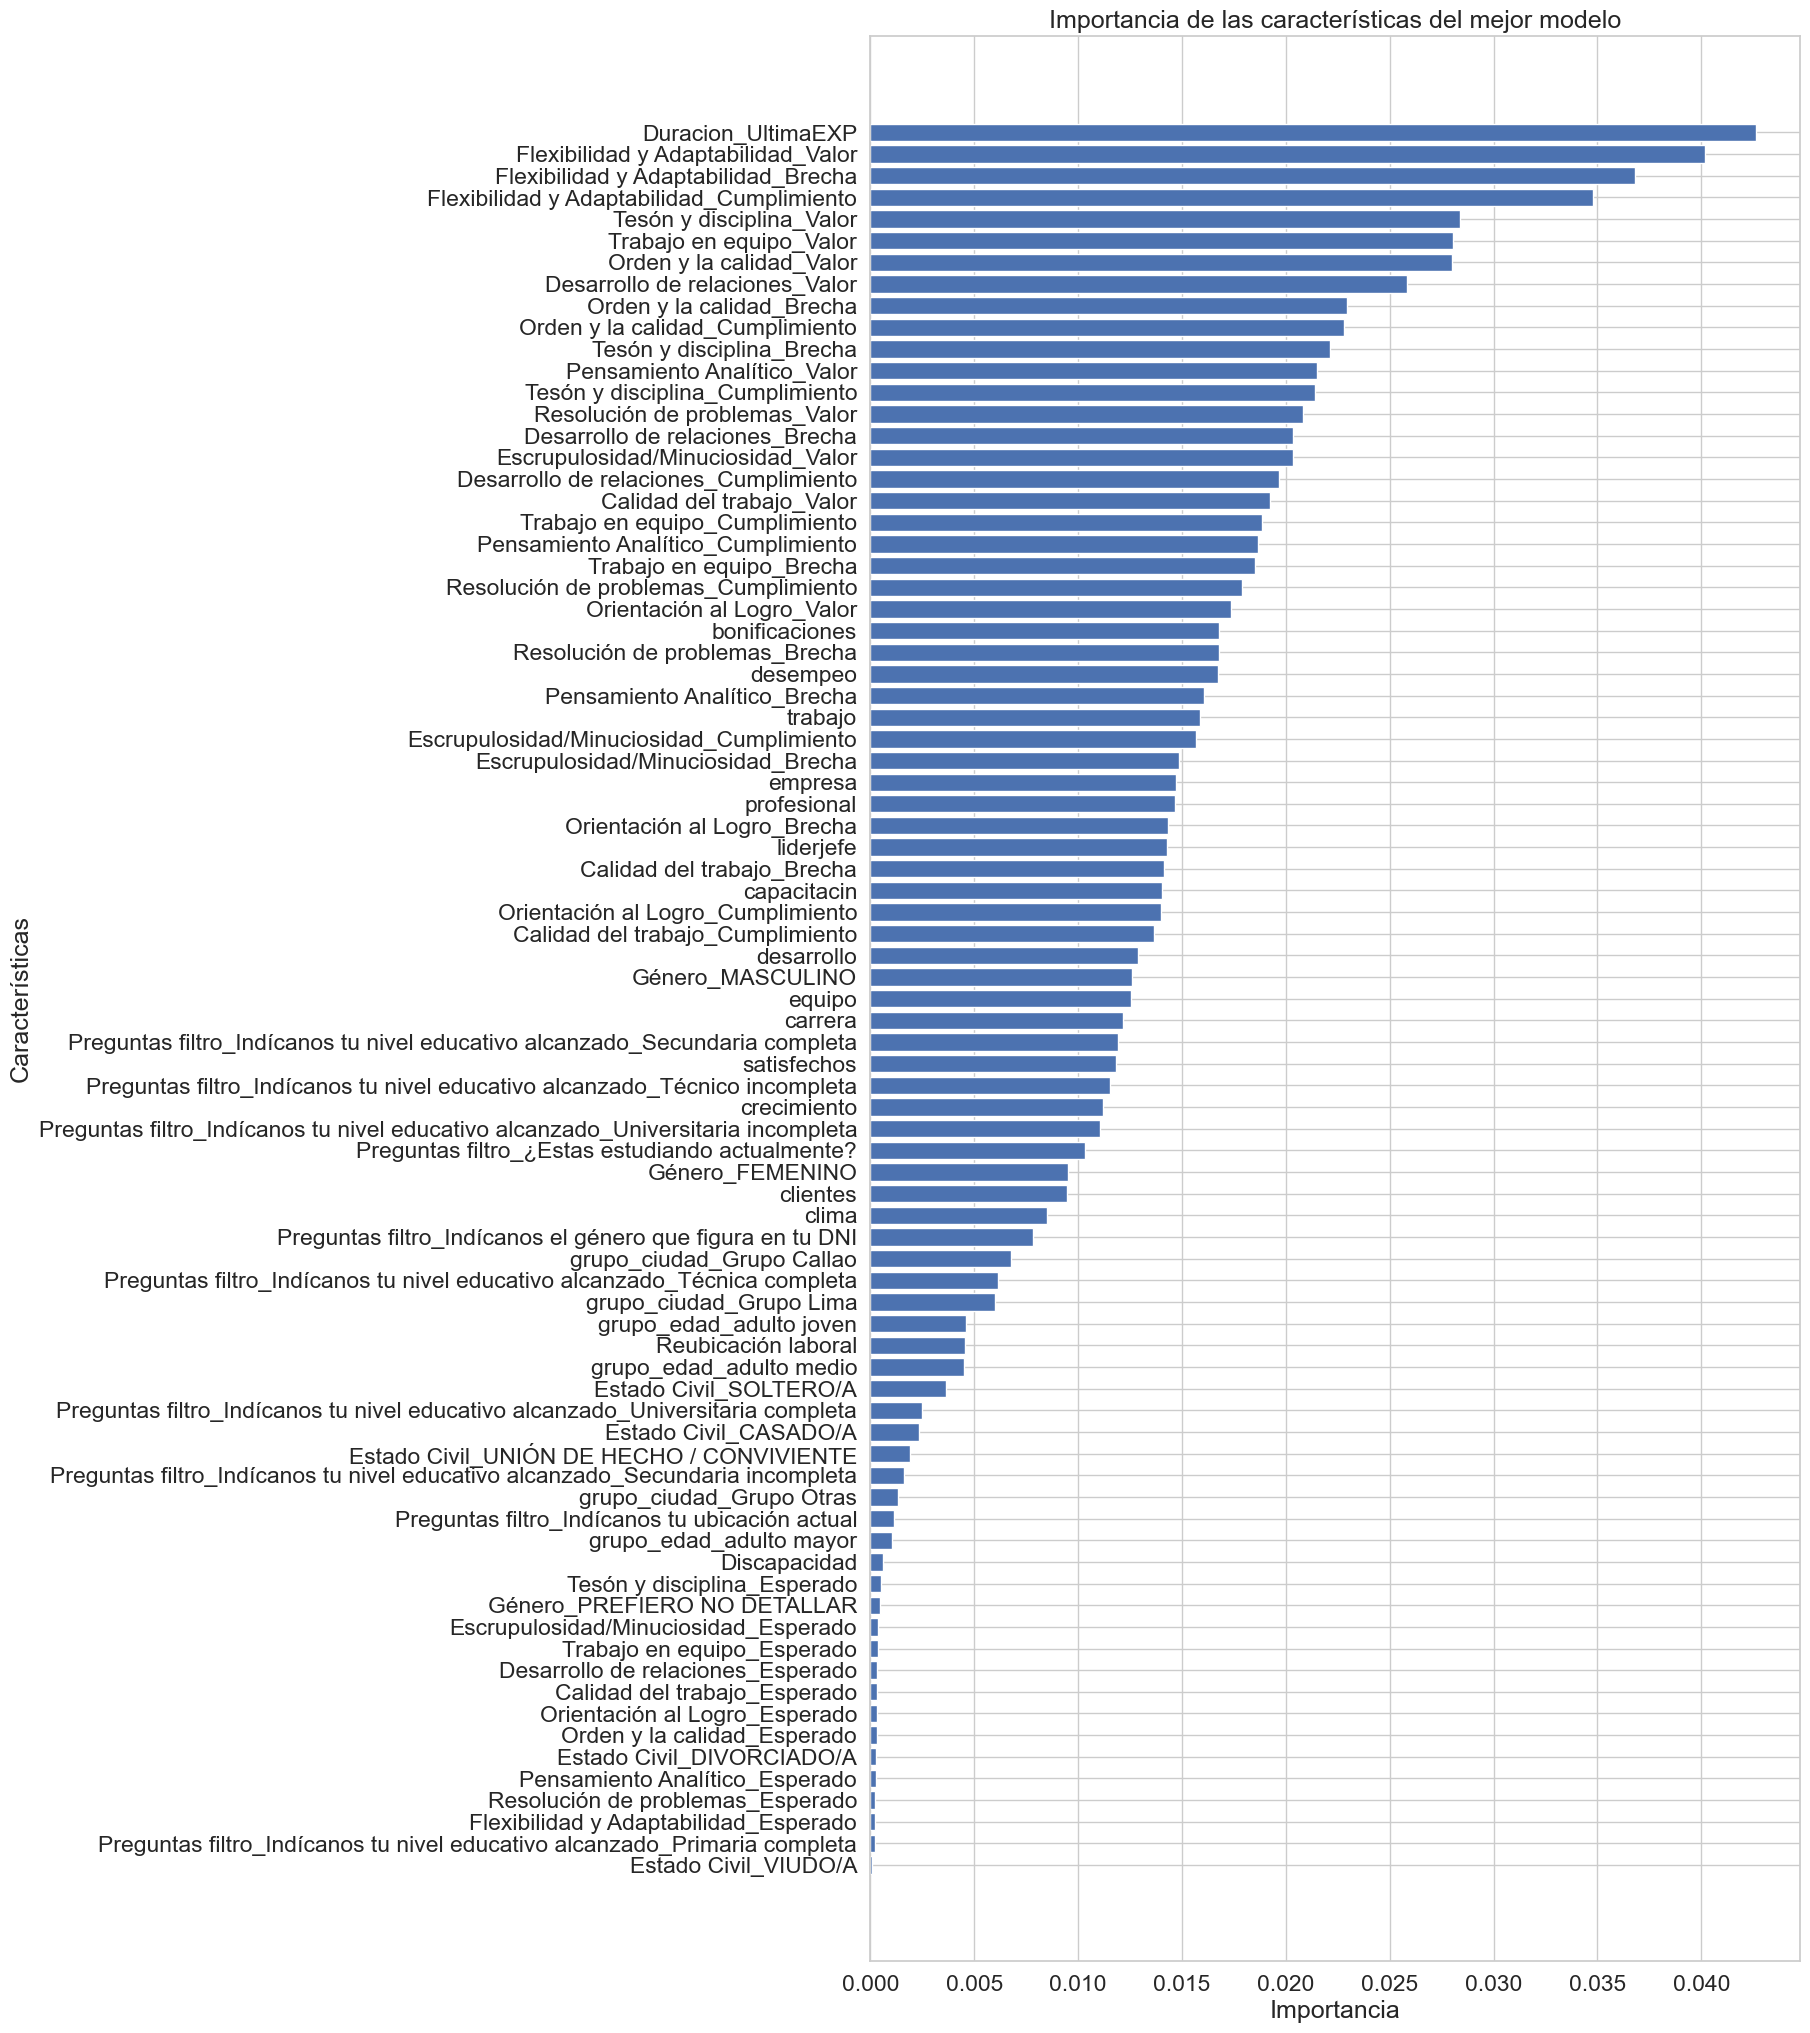

In [696]:
# Asumiendo que best_model es tu mejor modelo entrenado
feature_importances = mejor_modelo.feature_importances_

# Emparejar las importancias con los nombres de las características
features_list = X_train.columns
feature_importance_tuples = list(zip(features_list, feature_importances))

# Ordenar las características según su importancia
sorted_feature_importances = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Imprimir las características y su importancia
print("Importancia de las características:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Si deseas visualizarlo en una gráfica:
import matplotlib.pyplot as plt

features, importances = zip(*sorted_feature_importances)
plt.figure(figsize=(12, 25))
plt.barh(features, importances, align='center')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las características del mejor modelo")
plt.gca().invert_yaxis()  # para mostrar la característica más importante en la parte superior
plt.show()


#### **HIPERPARAMETRIZACION**

In [697]:
modelos_clases = {
    "LogisticRegression": LogisticRegression,
    "DecisionTreeClassifier": DecisionTreeClassifier,
    "RandomForestClassifier": RandomForestClassifier,
    "AdaBoostClassifier": AdaBoostClassifier,
    "GradientBoostingClassifier": GradientBoostingClassifier,
    "XGBClassifier": xgb.XGBClassifier,
    "LGBMClassifier": lgb.LGBMClassifier
}

# Luego, tu código para `RandomizedSearchCV` usando `modelos_clases`...


In [706]:
# Diccionario de hiperparámetros por modelo
param_distributions = {
    "LogisticRegression": {
        'C': np.logspace(-4, 4, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "DecisionTreeClassifier": {
        'max_depth': [None] + list(np.arange(1, 20)),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11)
    },
    "RandomForestClassifier": {
        'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
        'max_features': ['sqrt'],  # Cambia 'auto' por 'sqrt' aquí.
        'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "AdaBoostClassifier": {
        'n_estimators': np.arange(10, 200, 10),
        'learning_rate': np.linspace(0.1, 1.0, 10)
    },
    "GradientBoostingClassifier": {
        'n_estimators': np.arange(10, 200, 10),
        'learning_rate': np.linspace(0.1, 1.0, 10),
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'subsample': np.linspace(0.5, 1.0, 6)
    },
    "XGBClassifier": {
        'n_estimators': np.arange(10, 200, 10),
        'learning_rate': np.linspace(0.1, 1.0, 10),
        'max_depth': list(np.arange(1, 11))
    },
    "LGBMClassifier": {
        'n_estimators': np.arange(10, 200, 10),
        'learning_rate': np.linspace(0.1, 1.0, 10),
        'max_depth': list(np.arange(1, 11))
    }
}

# Diccionario con las clases de modelos
modelos_clases = {
    "LogisticRegression": LogisticRegression,
    "DecisionTreeClassifier": DecisionTreeClassifier,
    "RandomForestClassifier": RandomForestClassifier,
    "AdaBoostClassifier": AdaBoostClassifier,
    "GradientBoostingClassifier": GradientBoostingClassifier,
    "XGBClassifier": xgb.XGBClassifier,
    "LGBMClassifier": lgb.LGBMClassifier
}

# Seleccionar el conjunto de hiperparámetros para el mejor modelo
mejor_modelo_nombre = df_resultados.iloc[0, 0]
parametros_mejor_modelo = param_distributions[mejor_modelo_nombre]

# Crear el objeto RandomizedSearchCV para el mejor modelo
random_search = RandomizedSearchCV(
    modelos_clases[mejor_modelo_nombre](),  # Aquí es donde cambiamos a modelos_clases
    parametros_mejor_modelo, 
    n_iter=10, 
    cv=3, 
    scoring='roc_auc', 
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

# Ajustar los datos
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Best parameters for {mejor_modelo_nombre}: {random_search.best_params_}")
print(f"Best score for {mejor_modelo_nombre}: {random_search.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForestClassifier: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60}
Best score for RandomForestClassifier: 0.746940567265956


#### **ENTRENAMIENTO POST HIPERPARAMETRIZACION**

In [699]:
best_params = random_search.best_params_

# Crear y entrenar el modelo con los mejores parámetros
best_model = modelos_clases[mejor_modelo_nombre](**best_params)
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)


#### **EVALUACIÓN POST HIPERPARAMETRIZACION**

In [705]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Calcular métricas de evaluación
ACC_DESPUES = accuracy_score(y_test, y_pred)
print("ACURACCY: "+str(ACC_DESPUES))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

# Crear el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(class_report)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print("AUC-ROC Score: ")
print(roc_auc)


ACURACCY: 0.5973154362416108
Confusion Matrix: 
[[816 108]
 [492  74]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       924
         1.0       0.41      0.13      0.20       566

    accuracy                           0.60      1490
   macro avg       0.52      0.51      0.46      1490
weighted avg       0.54      0.60      0.53      1490

AUC-ROC Score: 
0.51665825340737


#### **VALIDACION POST HIPERPARAMETRIZACION**

In [709]:
df.shape


(4966, 82)

In [701]:
# Realiza la validación cruzada. El parámetro 'cv' determina el número de pliegues.
scores = cross_val_score(best_model, X_train, y_train, cv=5)

print('Puntajes de la validación cruzada: ', scores)
print('Puntaje medio de la validación cruzada: ', scores.mean())


Puntajes de la validación cruzada:  [0.544406   0.5455594  0.53117783 0.85103926 0.86951501]
Puntaje medio de la validación cruzada:  0.6683394999081007


Importancia de las características:
Duracion_UltimaEXP: 0.041319236358675814
Flexibilidad y Adaptabilidad_Valor: 0.04018921837232749
Flexibilidad y Adaptabilidad_Brecha: 0.03600602003381658
Flexibilidad y Adaptabilidad_Cumplimiento: 0.03448233435453289
Orden y la calidad_Valor: 0.028332960784225578
Tesón y disciplina_Valor: 0.026898540509342986
Trabajo en equipo_Valor: 0.026501304985469928
Desarrollo de relaciones_Valor: 0.025498962462832928
Tesón y disciplina_Brecha: 0.022139535567602748
Orden y la calidad_Cumplimiento: 0.02213786834747147
Orden y la calidad_Brecha: 0.02185673048364643
bonificaciones: 0.02102902515155576
Tesón y disciplina_Cumplimiento: 0.020988839245160262
Desarrollo de relaciones_Cumplimiento: 0.020517825368446197
Desarrollo de relaciones_Brecha: 0.020314741750006683
Pensamiento Analítico_Valor: 0.02019202265133752
Resolución de problemas_Valor: 0.020172976844472914
Calidad del trabajo_Valor: 0.019337029631541585
Escrupulosidad/Minuciosidad_Valor: 0.0190875741287188

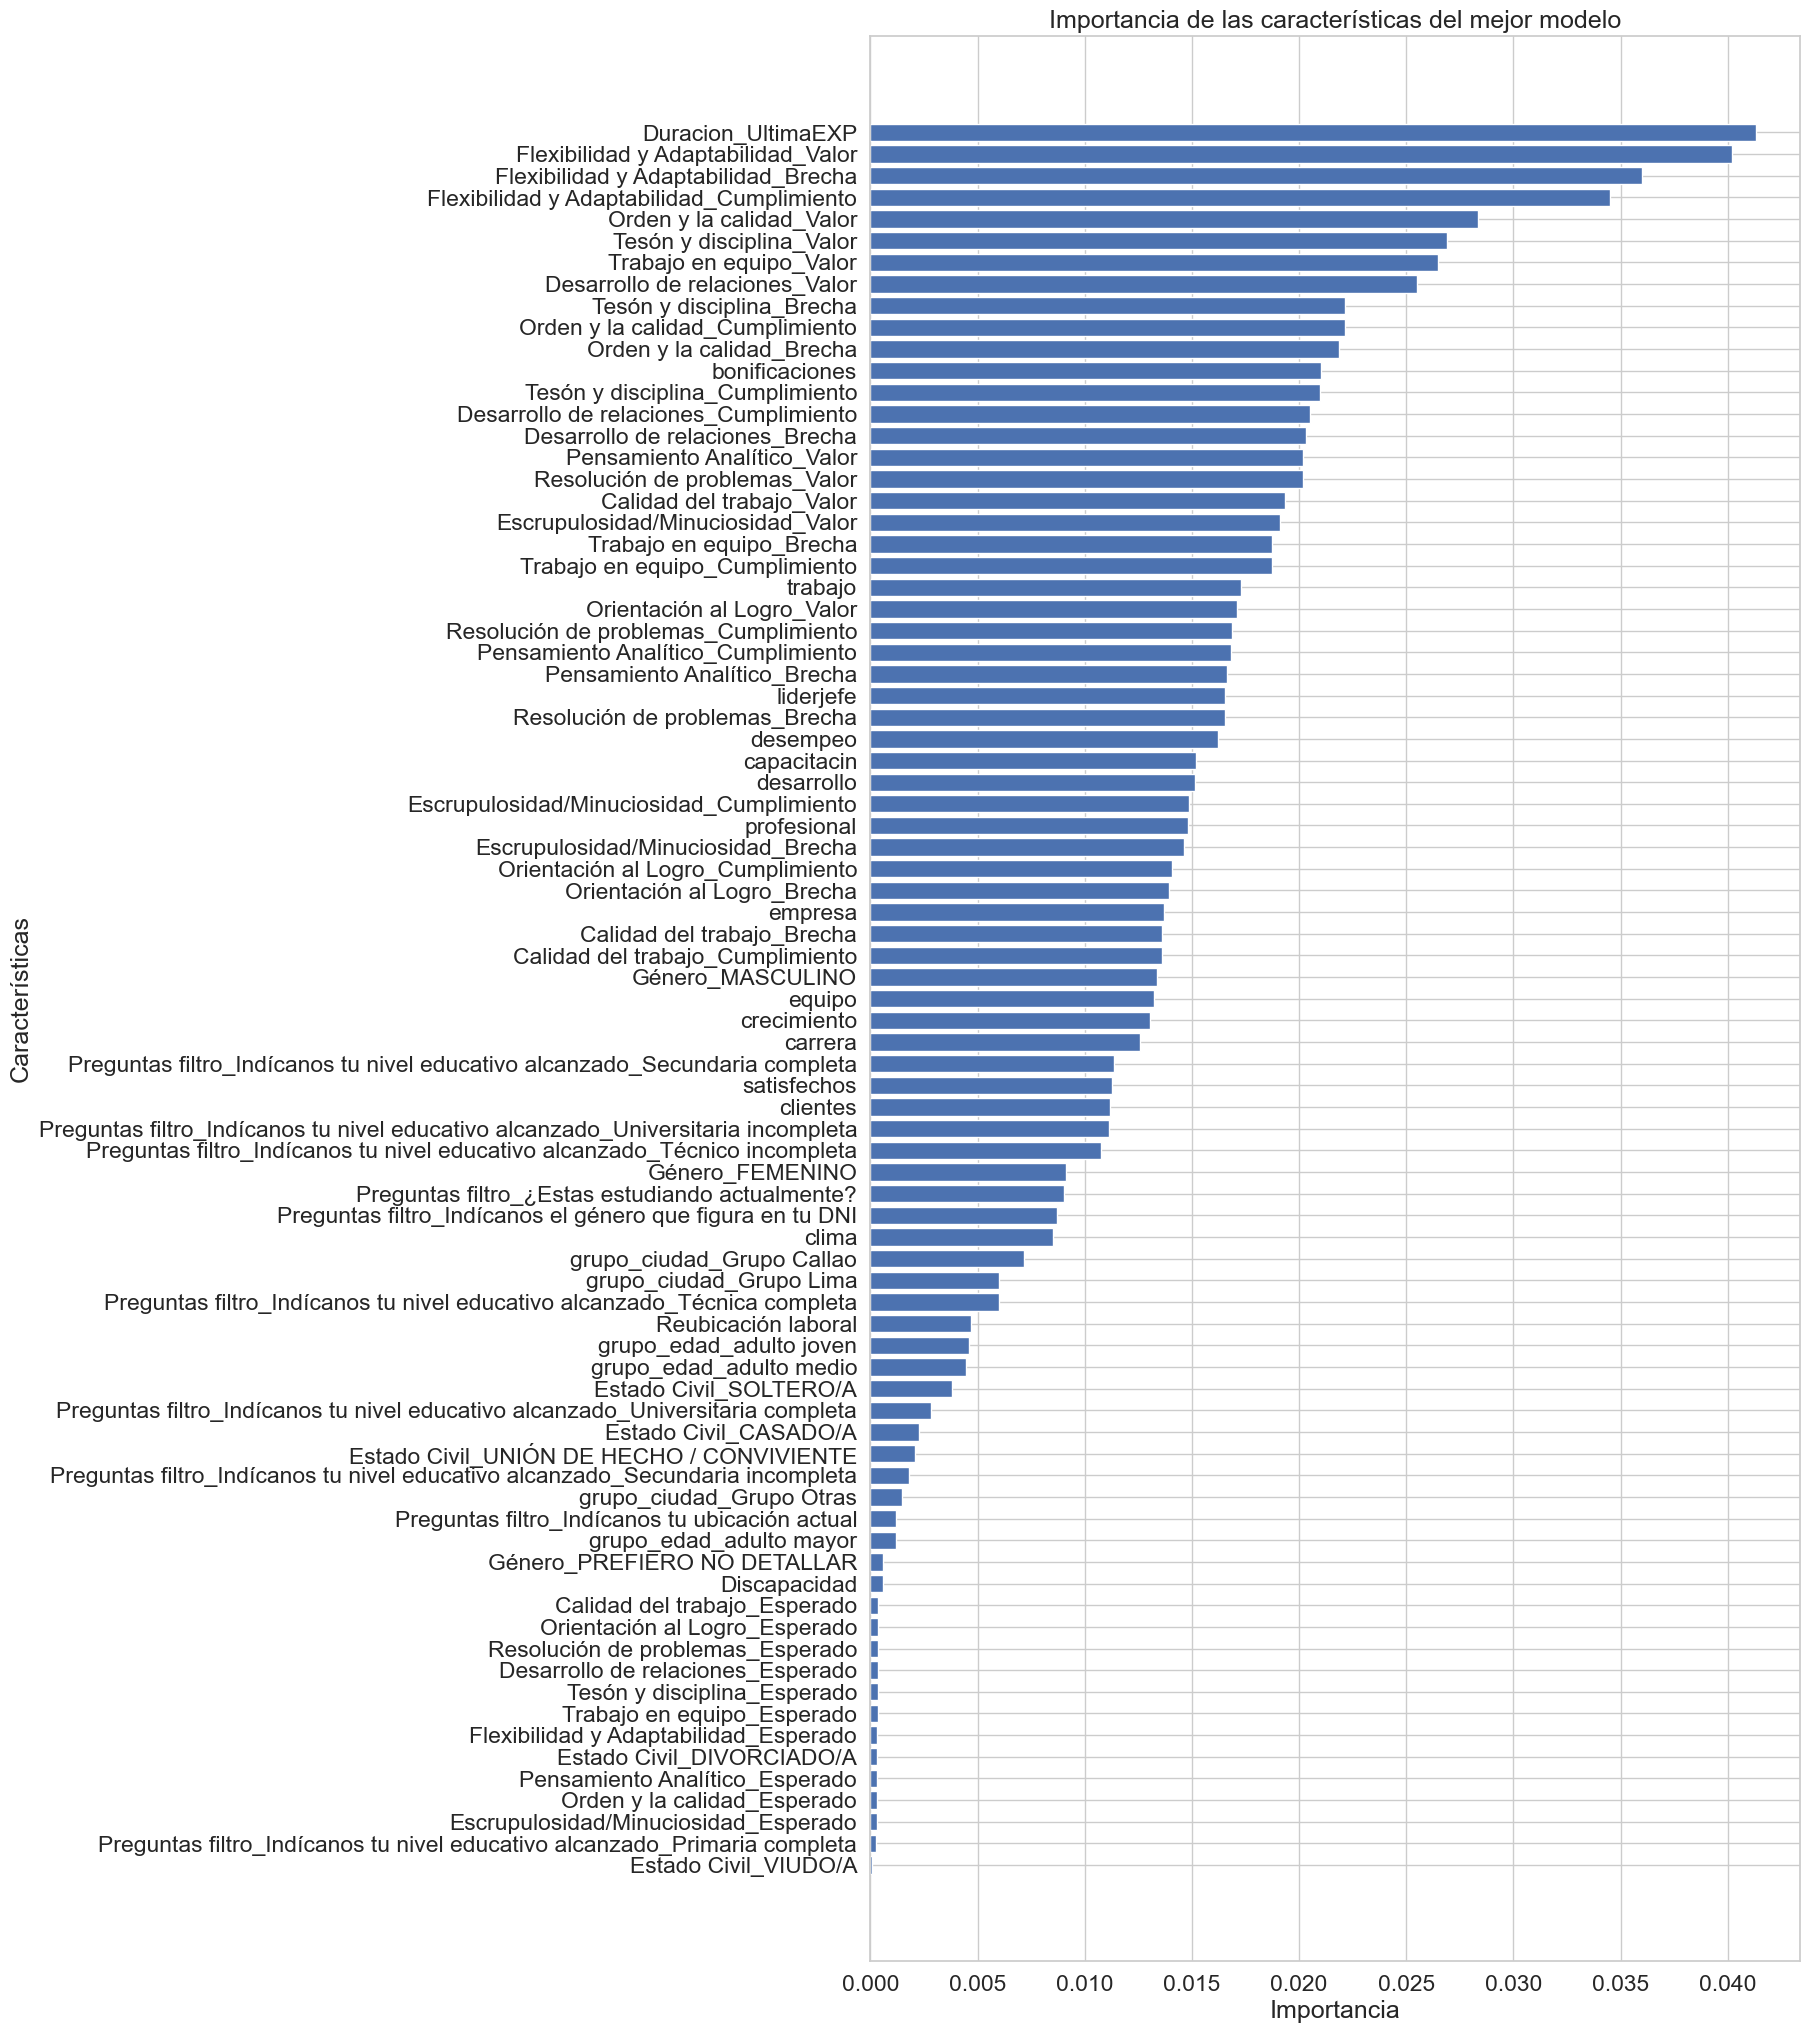

In [713]:
# Asumiendo que best_model es tu mejor modelo entrenado
feature_importances = best_model.feature_importances_

# Emparejar las importancias con los nombres de las características
features_list = X_train.columns
feature_importance_tuples = list(zip(features_list, feature_importances))

# Ordenar las características según su importancia
sorted_feature_importances = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Imprimir las características y su importancia
print("Importancia de las características:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Si deseas visualizarlo en una gráfica:
import matplotlib.pyplot as plt

features, importances = zip(*sorted_feature_importances)
plt.figure(figsize=(12, 25))
plt.barh(features, importances, align='center')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las características del mejor modelo")
plt.gca().invert_yaxis()  # para mostrar la característica más importante en la parte superior
# Guardar la gráfica en un archivo PNG
plt.savefig('Caracteristicas', bbox_inches='tight', dpi=300)
plt.show()



#### RECOMENDACIONES:

- MEJOR EDA
